In [1]:
import aniensemblestats as aes
import pandas as pd
import os

import matplotlib as mpl
import matplotlib.pyplot as plt

#import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

van Der Waals correction will be unavailable. Please install ased3


In [2]:
#errdir = '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/for_al_pub/'
#errdir = '/home/jujuman/Research/DataReductionMethods/train_test/error_compare/'
#tex_store = "/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/tables/AllTests_results_mean.tex"
#xls_store = "/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/tables/AllTests_results_mean.xlsx"
#tex_store = "/home/jujuman/Research/DataReductionMethods/train_test/tables/AllTests_results.tex"

#errdir = '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/emax_compare/'
#tex_store = "/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/tables/Emax_results_mean.tex"
#xls_store = "/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/tables/Emax_results_mean.xlsx"

#errdir = '/home/jujuman/Research/DataReductionMethods/al_working_network/error_compare/'

errdir = '/home/jsmith48/scratch/auto_al/modelCNOSFCl/tables/'
tex_store = "/home/jsmith48/scratch/auto_al/modelCNOSFCl/tables/AllTests_results_mean.tex"
xls_store = "/home/jsmith48/scratch/auto_al/modelCNOSFCl/tables/AllTests_results_mean.xlsx"

#efiles = [errdir+f for f in os.listdir(errdir)]
#tsname = ['DrugBank',
#          'Tripeptide',
#          'GDB07to09',
#          'MDBenchmark',
#          'GDB10to13',
#          's66x8',
#         ]

efiles = [errdir+f for f in os.listdir(errdir)]
tsname = ['DrugBk (SFCl)',
          'DrugBk (CHNO)',
          'GDB-07 (SFCl)',
          'GDB-08 (SFCl)',
          'GDB-09 (SFCl)',
          'GDB-10 (SFCl)',
          'GDB-11 (SFCl)',
          'GDB-07 (CHNO)',
          'GDB-08 (CHNO)',
          'GDB-09 (CHNO)',
          'GDB-10 (CHNO)',
          'GDB-11 (CHNO)',
         ]

for i in efiles:
    print(i)

/home/jsmith48/scratch/auto_al/modelCNOSFCl/tables/tsdata_0808.0302.0402.h5


In [3]:
eed = aes.evaluate_ensemble_data(efiles)
eed.get_totalerrorperatom_table(['GDB-10 (SFCl)','GDB-11 (SFCl)'])

,$\Delta$E$_\mathrm{MAE}$$\mu$,$\Delta$E$_\mathrm{RMS}$$\mu$,E$_\mathrm{MAE}$$\mu$,E$_\mathrm{RMS}$$\mu$
0808.0302.0402,74.45,175.27,82.33,150.64


In [4]:
#eed.get_ntwrk_error_table('0707.0001.0400')

In [5]:
#eed.get_ntwrk_error_table('0707.0001.0402')

In [6]:
#eed.get_ntwrk_error_table('0707.0001.0408')

In [7]:
eed.get_totalerror_table()

,$\Delta$E$_\mathrm{MAE}$$\mu$,$\Delta$E$_\mathrm{MAE}$$\sigma$,$\Delta$E$_\mathrm{RMS}$$\mu$,$\Delta$E$_\mathrm{RMS}$$\sigma$,E$_\mathrm{MAE}$$\mu$,E$_\mathrm{MAE}$$\sigma$,E$_\mathrm{RMS}$$\mu$,E$_\mathrm{RMS}$$\sigma$,F$_\mathrm{MAE}$$\mu$,F$_\mathrm{MAE}$$\sigma$,F$_\mathrm{RMS}$$\mu$,F$_\mathrm{RMS}$$\sigma$
0808.0302.0402,1.82,0.03,3.37,0.16,1.94,0.04,3.51,0.29,3.46,0.04,5.88,0.49


In [17]:
eed.get_error_table(tskey='DrugBk (CHNO)')

,$\Delta$E$_\mathrm{MAE}$$\mu$,$\Delta$E$_\mathrm{MAE}$$\sigma$,$\Delta$E$_\mathrm{RMS}$$\mu$,$\Delta$E$_\mathrm{RMS}$$\sigma$,E$_\mathrm{MAE}$$\mu$,E$_\mathrm{MAE}$$\sigma$,E$_\mathrm{RMS}$$\mu$,E$_\mathrm{RMS}$$\sigma$,F$_\mathrm{MAE}$$\mu$,F$_\mathrm{MAE}$$\sigma$,F$_\mathrm{RMS}$$\mu$,F$_\mathrm{RMS}$$\sigma$
0808.0302.0402,2.42,0.05,3.37,0.06,2.93,0.21,5.28,1.36,3.31,0.07,5.14,0.32


In [9]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(xls_store, engine='xlsxwriter')

# Build latex document
header = r'\documentclass{article}'+'\n'+r'\usepackage{booktabs}'+'\n'+r'\usepackage[margin=1.0in]{geometry}'+'\n'+r'\begin{document}'+'\n'

begtab = r'\begin{table}'+'\n'+r'\centering'+'\n'+r'\tiny'+'\n'
endtab = r'\end{table}'+'\n'
enddoc = r'\end{document}'
styles = []
with open(tex_store, "w") as text_file:
    text_file.write(header)
    print('Stats for: Complete benchmark')
    etab = eed.get_totalerror_table()
    styles.append(etab.style)
    text_file.write(begtab+r'\caption{Data set: Complete benchmark}'+'\n'+etab.to_latex(escape=False)+endtab)

    # Convert the dataframe to an XlsxWriter Excel object.
    etab.to_excel(writer, sheet_name="Complete Benchmark")

    paetab = eed.get_totalerrorperatom_table()
    text_file.write(begtab+r'\caption{Data set: Complete benchmark per atom}'+'\n'+paetab.to_latex(escape=False)+endtab)
    paetab.to_excel(writer, sheet_name="Complete Benchmark per atom")
    
    
    for k in tsname:
        print('Stats for:',k)
        etab = eed.get_error_table(k)
        etab.to_excel(writer, sheet_name=k)
        styles.append(etab.style)
        text_file.write(begtab+r'\caption{Data set: '+k+r'}'+'\n'+etab.to_latex(escape=False)+endtab)
    text_file.write(enddoc)
styles[0]

# Close the Pandas Excel writer and output the Excel file.
writer.save()

Stats for: Complete benchmark
Stats for: DrugBk (SFCl)
Stats for: DrugBk (CHNO)
Stats for: GDB-07 (SFCl)
Stats for: GDB-08 (SFCl)
Stats for: GDB-09 (SFCl)
Stats for: GDB-10 (SFCl)
Stats for: GDB-11 (SFCl)
Stats for: GDB-07 (CHNO)
Stats for: GDB-08 (CHNO)
Stats for: GDB-09 (CHNO)
Stats for: GDB-10 (CHNO)
Stats for: GDB-11 (CHNO)


Step: 64082 S: 0.237022165855   -Perc over: 99.025069637883 Total 91.73452768729642
RMSE Over:   8.11982267635
RMSE Under:  4.1772362959


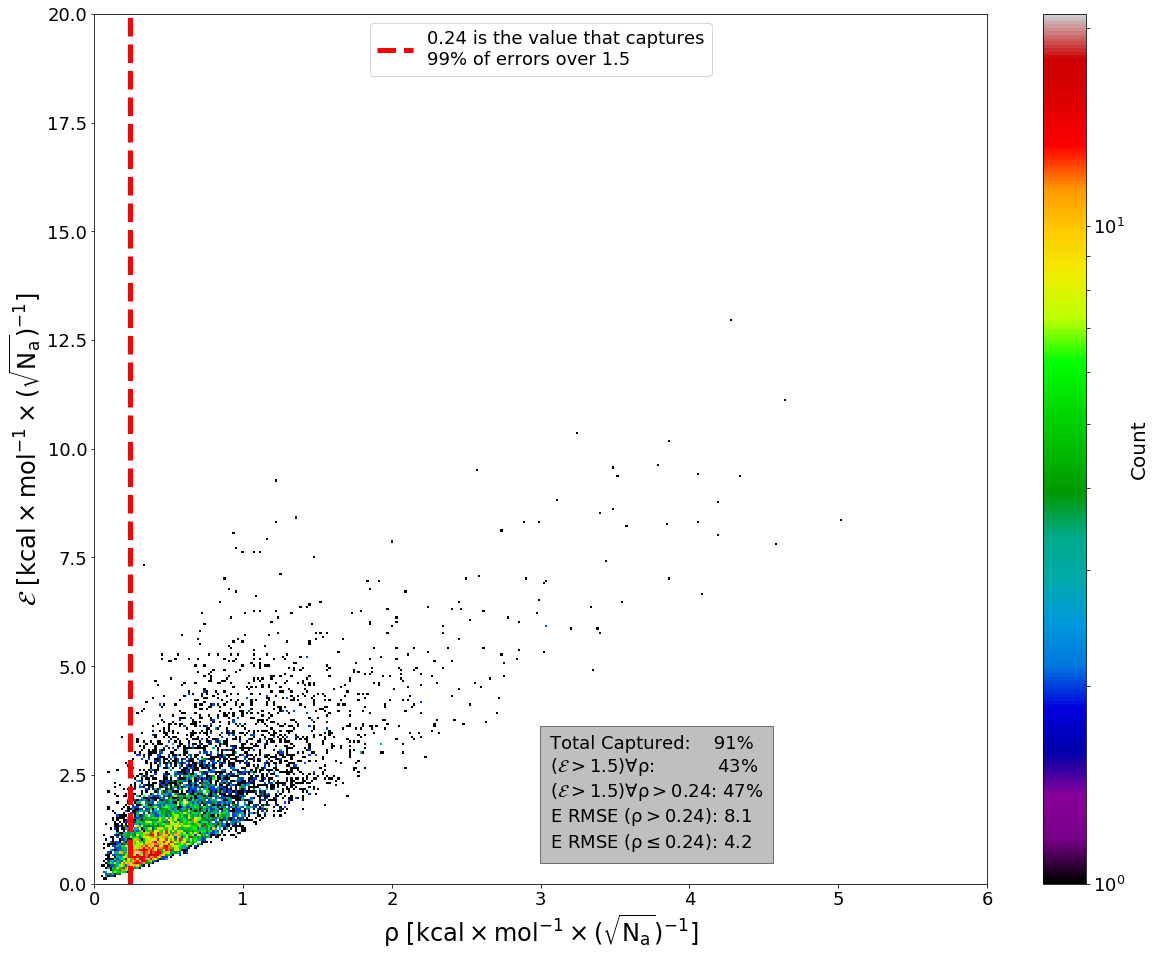

In [36]:
cmap = mpl.cm.nipy_spectral
eed.determine_min_error_by_sigma('0808.0302.0402',
                                 1.5, 99.0,
                                 labelx=r'$\mathrm{\rho}$ [$\mathrm{kcal \times mol^{-1} \times (\sqrt{N_a})^{-1}}}$]',
                                 labely=r'$\mathrm{\mathcal{E}}$ [$\mathrm{kcal \times mol^{-1} \times (\sqrt{N_a})^{-1}}$]',
                                 xymax=(6.0,20.0),
                                 figsize=(20.0, 16.0),
                                 cmap=cmap,
                                 tskeys=['DrugBk (SFCl)'],
                                 #storepath='/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/Figures/rho_selection_6.0.0.pdf',
                                 )

In [11]:
print(eed.get_net_keys())
#print(eed.get_size("9.0.5","MDBenchmark"))
#print(eed.get_size("9.0.4","Tripeptide"))
#print(eed.get_size("9.0.4","GDB07to09"))
#print(eed.get_size("9.0.4","GDB10to13"))

dict_keys(['0808.0302.0402'])


In [12]:
#eed.generate_correlation_plot('6.0.0','MDBenchmark','Fani','Fdft')
#cmap = mpl.cm.nipy_spectral
#eed.generate_correlation_plot('ANI-0707.0001.0410_bt5','GDB-11 (SFCl)','Fani','Fdft',cmap=cmap)
#eed.generate_correlation_plot('0707.0001.0402','GDB-07 (SFCl)','dEani','dEdft')
#eed.generate_correlation_plot('0707.0001.0402','GDB-08 (SFCl)','dEani','dEdft')
#eed.generate_correlation_plot('0707.0001.0402','GDB-09 (SFCl)','dEani','dEdft')
#eed.generate_correlation_plot('0707.0001.0402','GDB-10 (SFCl)','dEani','dEdft')
#eed.generate_correlation_plot('0707.0001.0402','GDB-11 (SFCl)','dEani','dEdft')
#eed.generate_correlation_plot('AL6','DrugBank','Fani','Fdft')
#eed.generate_correlation_plot('ARC1','MDBenchmark','Fani','Fdft')
#eed.generate_correlation_plot('ARC8','MDBenchmark','Fani','Fdft')

In [13]:
#eed.plot_bar_propsbynet([('Total Energy',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft',[0.0,23.0]),
#                         ('Relative Energy',r'RMSE ($kcal \times mol^{-1}$)','dEani', 'dEdft',[0.0,12.0]),
#                         ('Force',r'RMSE ($kcal \times mol^{-1} \times \AA^{-1}$)','Fani', 'Fdft',[0.0,10.0])], 
#                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 's66x8'],
#                         ntwks=['6.0.0','7.0.4','8.0.6','8.3.6','9.0.4','ANI-1'],
#                         fontsize=30, bbox_to_anchor=(0.3, 1.0), figsize=(40.0, 32.0), ncol=2, errortype='RMSE')

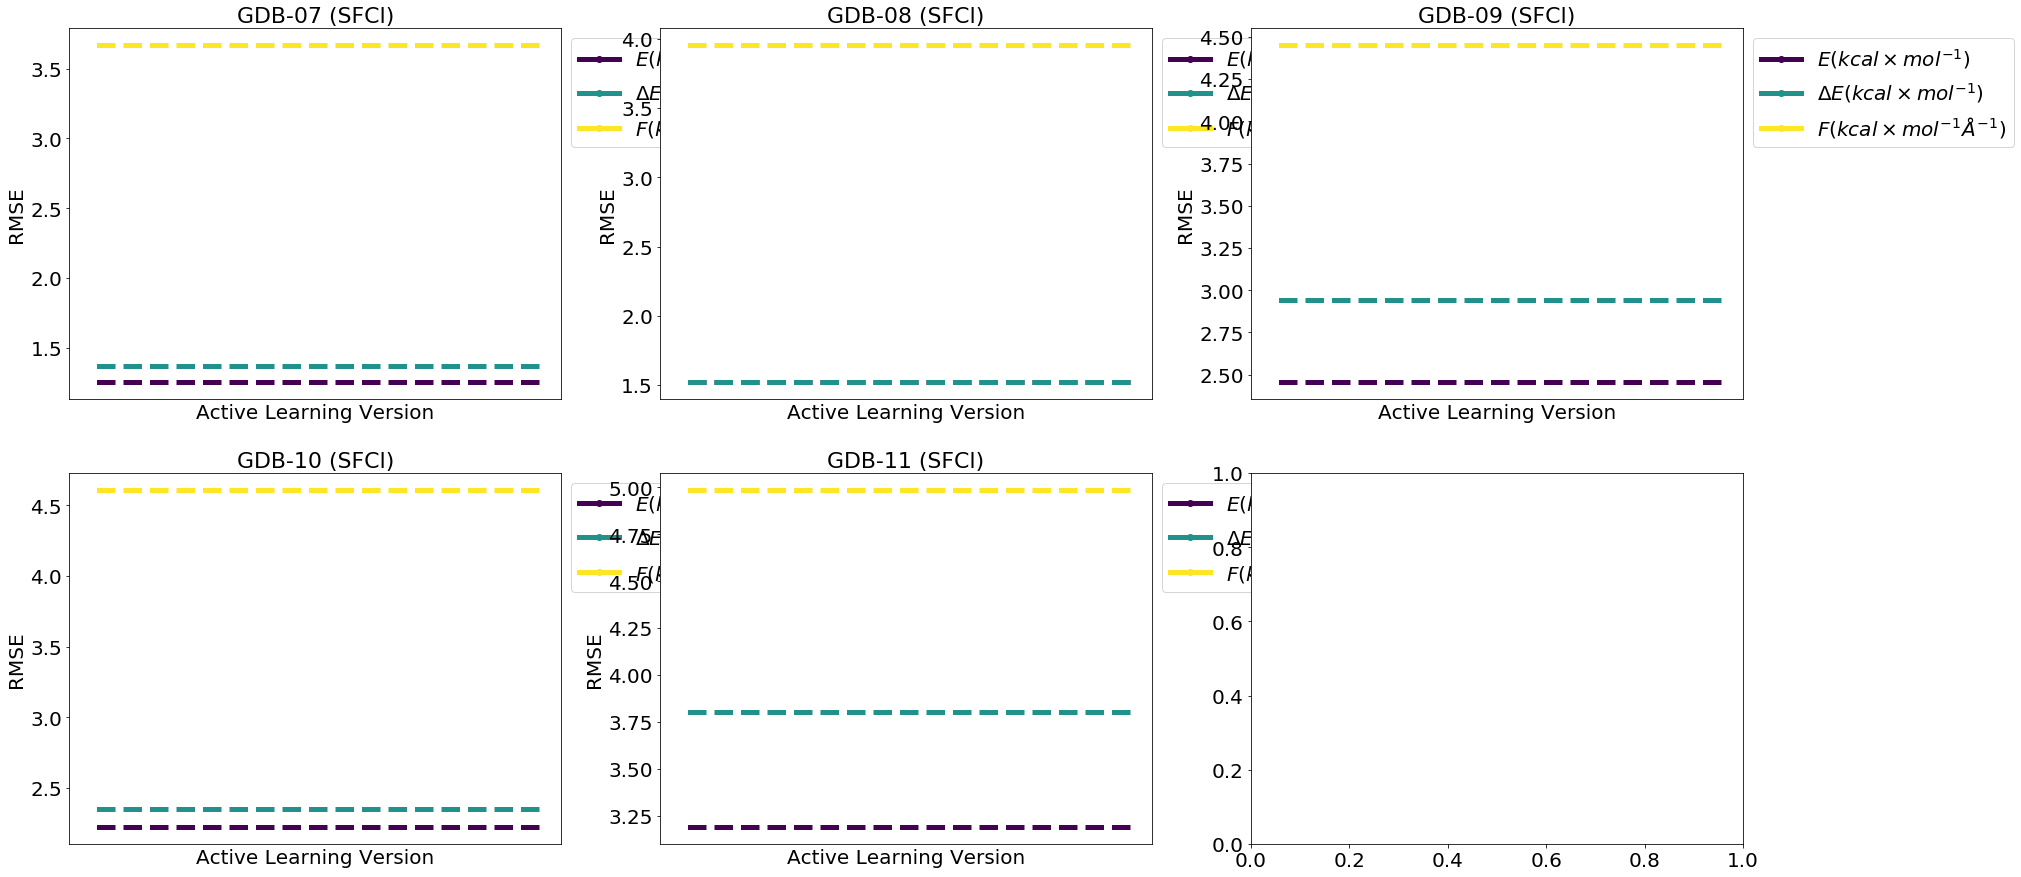

In [14]:
eed.plot_error_by_net([(r'$E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft'),
                       (r'$\Delta E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','dEani','dEdft'),
                       (r'$F (kcal \times mol^{-1}\AA^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Fani','Fdft'),], 
                         ['GDB-07 (SFCl)', 'GDB-08 (SFCl)', 'GDB-09 (SFCl)', 'GDB-10 (SFCl)', 'GDB-11 (SFCl)'],
                         ntwks=['0808.0302.0402'],
                         fontsize=20, bbox_to_anchor=(1.0, 1.0), figsize=(30.0, 15.0), ncol=1, errortype='RMSE',
                        #storepath='/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/Figures/figure_TSALvsANI_RMSE.pdf',
                      )

In [15]:
eed.plot_error_by_net([(r'$E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft'),
                       (r'$\Delta E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','dEani','dEdft'),
                       (r'$F (kcal \times mol^{-1}\AA^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Fani','Fdft'),], 
                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 'MDBenchmark', 's66x8'],
                         ntwks=['AL1', 'AL2', 'AL3', 'AL4', 'AL5', 'AL6', 'ANI-1'],
                         fontsize=20, bbox_to_anchor=(1.0, 1.0), figsize=(30.0, 15.0), ncol=1, errortype='RMSE',
                        #storepath='/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/Figures/figure_TSALvsANI_RMSE.pdf')

SyntaxError: unexpected EOF while parsing (<ipython-input-15-19e6f5049dd7>, line 7)

In [ ]:
eed.plot_error_by_net([(r'$E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft'),
                       (r'$\Delta E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','dEani','dEdft'),
                       (r'$F (kcal \times mol^{-1}\AA^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Fani','Fdft'),], 
                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 'MDBenchmark', 's66x8'],
                         ntwks=['AL1', 'AL2', 'AL3', 'AL4', 'AL5', 'AL6', 'ANI-1'],
                         fontsize=20, bbox_to_anchor=(1.0, 1.0), figsize=(30.0, 15.0), ncol=1, errortype='MAE',
                        #storepath='/home/jujuman/Dropbox/ANAKIN-ME-RESEARCH/PUBLICATION-ActiveLearning/Figures/figure_TSALvsANI_MAE.pdf')
#eed.generate_violin_distribution('GDB10to13')

In [ ]:
'''
eed.plot_error_by_net([(r'$E_T (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft'),
                       (r'$\Delta E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','dEani','dEdft'),
                       (r'$F (kcal \times mol^{-1}\AA^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Fani','Fdft'),], 
                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 'MDBenchmark', 's66x8'],
                         ntwks=['ARC1','ARC2','ARC3','ARC4','ARC5','ARC6','ARC7','ARC8'],
                        fontsize=20, bbox_to_anchor=(1.0, 1.0), figsize=(20.0, 30.0), ncol=1, errortype='RMSE',
                        storepath='/home/jujuman/Research/DataReductionMethods/train_test/tables/figure_TSALvsANI_RMSE.pdf')
'''

In [24]:
Edft1 = eed.get_range_stats(tslist=['GDB-10 (SFCl)'],dkey='dEdft')

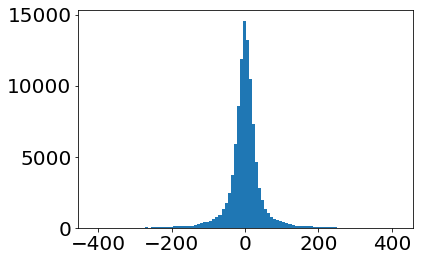

In [25]:
plt.hist(Edft1,bins=100)
plt.show()

In [26]:
Edft2 = eed.get_range_stats(tslist=['GDB-10 (CHNO)'],dkey='dEdft')

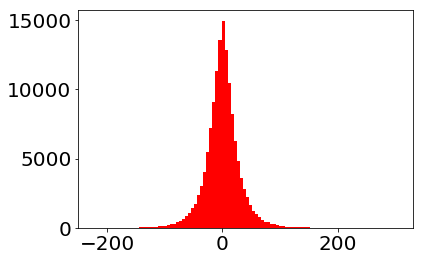

In [27]:
plt.hist(Edft2,bins=100,color='r')
plt.show()